### Contruct and train a simple neural network to classify radio sources¶
In this notebook we will contruct a simple convolutional neural network to classify a sample of point radio sources and unknown morphology. The sample dataset is small and already preprocessed. Here we will just simply load the data, split them into training and test sets, train and test the network.

### Load the dataset
I have made a small dataset and done all necessary preprocessing and some other dark magic to the images. So at this point we will just load this data and play around.

In [5]:
# Load data and labels
data = np.load('Data/data.npy')
labels = np.load('Data/labels.npy')

# Print some info
print data.shape

(1125, 60, 60)


Lets look at two samples from the two classes¶

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


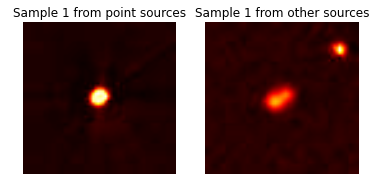

In [8]:
import matplotlib.pyplot as pylab
%pylab inline


pylab.subplot(1,2,1)
pylab.imshow(data[1,:,:],'hot')
pylab.axis('off')
pylab.title('Sample 1 from point sources')


pylab.subplot(1,2,2)
pylab.imshow(data[817,:,:],'hot')
pylab.axis('off')
pylab.title('Sample 1 from other sources')

Lets split the data into training and testing samples as usual¶


In [28]:
X_train = data[:1000, :, :, np.newaxis]
X_test = data[:-1000, :, :, np.newaxis]
y_train = labels[:1000]
y_test = labels[:-1000]
print labels.max()

2.0


In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

### We will be using a Convolutional Neural Network (CNN) to work the problem
For now treat the CNN as a black box and believe in me. You can find plenty of resources on the web. Simply speaking this neural network has

Input Layer

3 hidden layers

Output layer with two neurons

The network will train until a threshold condition for the loss function has reached.

In [ ]:
model = Sequential()

model.add(Conv2D(8, (3, 3), input_shape=X_train.shape[1:]))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(2))

model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1000/1000 [==============================] - 11s 11ms/step - loss: -6.9509 - acc: 0.5640: 16s -  - ETA: 2s - loss: -7.0545
Epoch 2/10
1000/1000 [==============================] - 11s 11ms/step - loss: -6.9509 - acc: 0.5640
Epoch 3/10
1000/1000 [==============================] - 16s 16ms/step - loss: -6.9509 - acc: 0.5640: 17s -  - ETA: 1s - loss: -6.8717 - acc: 
Epoch 4/10
  96/1000 [=>............................] - ETA: 3:27 - loss: -7.3069 - acc: 0.5417